<a href="https://colab.research.google.com/github/ameerag2343/AI/blob/main/DT_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset= pd.read_csv('/content/sample_data/bill_authentication.csv')
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [6]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
#Training the decision tree classification model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
#Predicting the test result
y_pred = classifier.predict(x_test)
print(y_pred.shape,y_test.shape)

(275,) (275,)


Making the confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(y_test,y_pred))
print(y_test.shape)
cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

(275,)
[[154   3]
 [  1 117]]


In [13]:
accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy is ' + str(accuracy) + '%')

Accuracy is 98.54545454545455%


Visualising the training set results

**Visualise text representation**

|--- feature_0 <= -0.05
|   |--- feature_1 <= 0.69
|   |   |--- feature_2 <= 1.26
|   |   |   |--- feature_0 <= -0.24
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.24
|   |   |   |   |--- feature_0 <= -0.23
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.23
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  1.26
|   |   |   |--- feature_1 <= -1.15
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.15
|   |   |   |   |--- class: 0
|   |--- feature_1 >  0.69
|   |   |--- feature_0 <= -1.36
|   |   |   |--- feature_3 <= -0.36
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.36
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.36
|   |   |   |--- class: 0
|--- feature_0 >  -0.05
|   |--- feature_0 <= 0.69
|   |   |--- feature_2 <= -0.84
|   |   |   |--- feature_1 <= 0.78
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.78
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  -0.84
|   |   |  

[Text(0.5208333333333334, 0.9375, 'x[0] <= -0.051\nentropy = 0.992\nsamples = 1097\nvalue = [605, 492]'),
 Text(0.3125, 0.8125, 'x[1] <= 0.688\nentropy = 0.679\nsamples = 524\nvalue = [94, 430]'),
 Text(0.4166666666666667, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'x[2] <= 1.262\nentropy = 0.278\nsamples = 416\nvalue = [20, 396]'),
 Text(0.08333333333333333, 0.5625, 'x[0] <= -0.238\nentropy = 0.032\nsamples = 304\nvalue = [1, 303]'),
 Text(0.041666666666666664, 0.4375, 'entropy = 0.0\nsamples = 266\nvalue = [0, 266]'),
 Text(0.125, 0.4375, 'x[0] <= -0.235\nentropy = 0.176\nsamples = 38\nvalue = [1, 37]'),
 Text(0.08333333333333333, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.3125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.25, 0.5625, 'x[1] <= -1.153\nentropy = 0.657\nsamples = 112\nvalue = [19, 93]'),
 Text(0.20833333333333334, 0.4375, 'entropy = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(0.2916666666666667, 0.4375, 'en

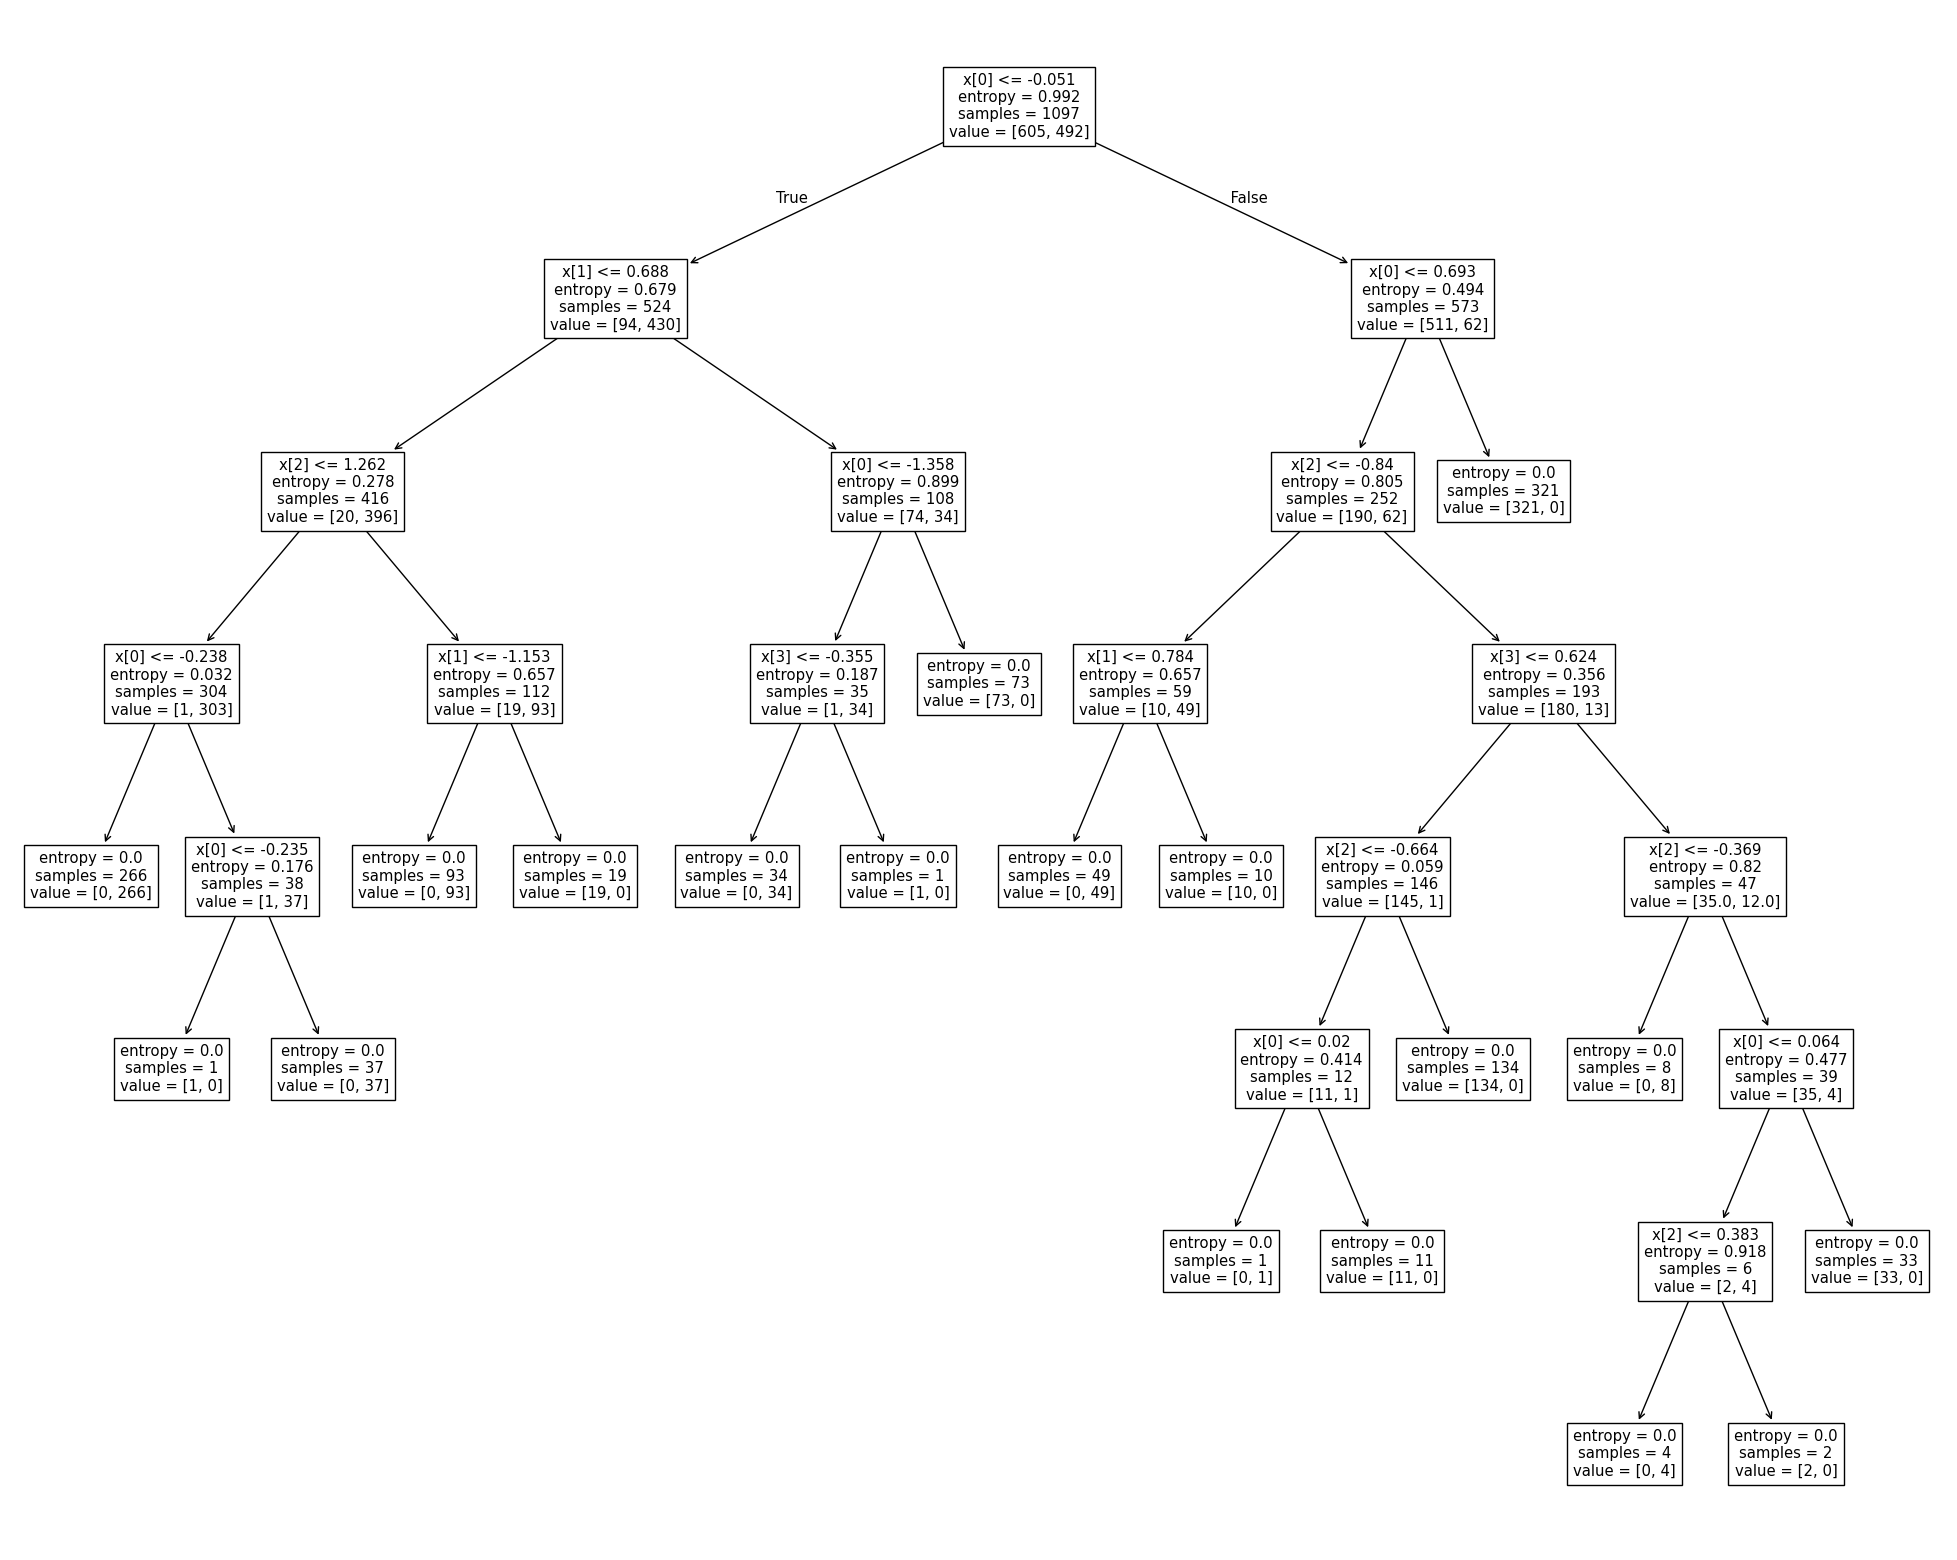

In [17]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
text_representation = tree.export_text(classifier)
print(text_representation)

fig=plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
